In [2]:
%matplotlib inline
import sys,os,getopt,argparse,math
import numpy as np
import matplotlib.pyplot as plt


First read in the file and create data as numpy 1Darray of times  

In [3]:
mavSerialList=[]
with open('maverick_serial') as f:
    for line in f:
      mavSerialList.append(float(line.split()[1]))
mavSerialArray=np.asarray(mavSerialList)

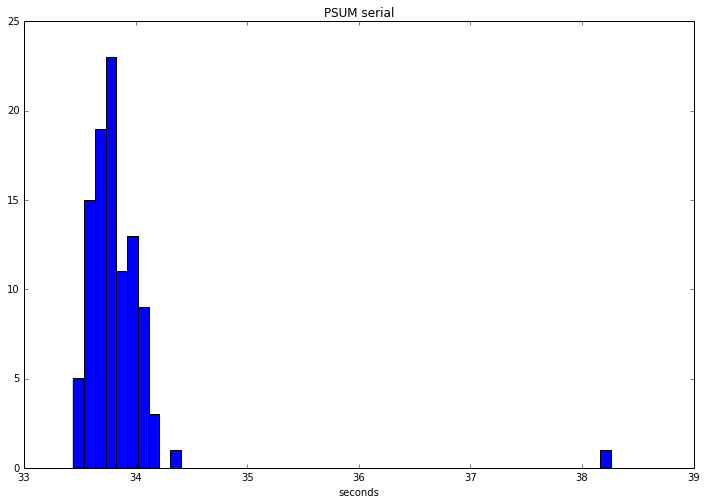

In [4]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.hist(mavSerialArray,50)
plt.xlabel('seconds')
plt.title('PSUM serial')
plt.show()


In [4]:
#fastOpenMP1_data=np.array(filter(lambda x: x <= 42., dataArray))

In [5]:
print 'PSUM serial average is' ,np.average(mavSerialArray)
print 'PSUM serial standard deviation is',np.std(mavSerialArray)

PSUM serial average is 33.84031
PSUM serial standard deviation is 0.481275507688


In [6]:
testList=['serial','stdVec','openmp','openmp-2','tbb_rankBuffer','tbb_singleBuffer']
threadCount=[1,2,4,8,10,12,14,16,18,19,20,25,30,35,40]


In [7]:
dataListDict={}
dataArrayDict={}
for test in testList[1:]:
    for thread in threadCount[1:]:
        listPre='maverick_' + test + '_' + str(thread) 
        dataFileName=listPre + '.txt'
        listName=listPre
        dataListDict[listName]=[]
        with open(dataFileName) as f:
          for line in f:
            #print line
            if "tbb" in test:
              dataListDict[listName].append(float(line.split()[4]))
            else:
              dataListDict[listName].append(float(line.split()[2]))
for key in dataListDict:
    dataArrayDict[key]=np.asanyarray(dataListDict[key])

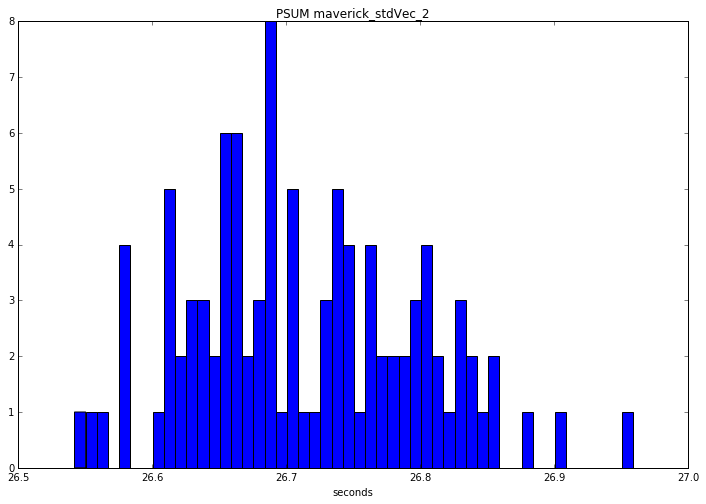

In [30]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='maverick_stdVec_2'
ax.hist(dataArrayDict[dk],50)
plt.xlabel('seconds')
plt.title('PSUM '+ dk)
plt.show()

In [8]:
dataArrayDict.keys()

['maverick_openmp_30',
 'maverick_tbb_rankBuffer_4',
 'maverick_openmp_35',
 'maverick_tbb_rankBuffer_2',
 'maverick_openmp_8',
 'maverick_openmp-2_19',
 'maverick_tbb_rankBuffer_8',
 'maverick_stdVec_18',
 'maverick_tbb_singleBuffer_8',
 'maverick_stdVec_20',
 'maverick_stdVec_40',
 'maverick_stdVec_25',
 'maverick_openmp-2_18',
 'maverick_openmp-2_16',
 'maverick_tbb_singleBuffer_2',
 'maverick_openmp-2_14',
 'maverick_tbb_singleBuffer_4',
 'maverick_openmp-2_12',
 'maverick_openmp-2_10',
 'maverick_openmp_4',
 'maverick_tbb_rankBuffer_40',
 'maverick_tbb_singleBuffer_18',
 'maverick_tbb_singleBuffer_19',
 'maverick_openmp_2',
 'maverick_tbb_singleBuffer_12',
 'maverick_tbb_singleBuffer_35',
 'maverick_tbb_singleBuffer_10',
 'maverick_tbb_singleBuffer_16',
 'maverick_tbb_singleBuffer_14',
 'maverick_stdVec_16',
 'maverick_tbb_rankBuffer_25',
 'maverick_openmp-2_8',
 'maverick_openmp_18',
 'maverick_tbb_rankBuffer_20',
 'maverick_openmp_16',
 'maverick_openmp-2_2',
 'maverick_openmp_1

In [9]:
openMpVal=[]
openMpTcount=[]
openMp2Val=[]
openMp2Tcount=[]
tbbRankVal=[]
tbbRankTcount=[]
tbbSingleVal=[]
tbbSingleTcount=[]
for key in dataArrayDict:
    if key.split("_")[1]=='openmp':
        openMpVal.append(np.average(dataArrayDict[key]))
        openMpTcount.append(key.split("_")[-1])
    if key.split("_")[1]=='openmp-2':
      openMp2Val.append(np.average(dataArrayDict[key]))
      openMp2Tcount.append(key.split("_")[-1])
    if 'tbb_rankBuffer' in key:
      tbbRankVal.append(np.average(dataArrayDict[key]))
      tbbRankTcount.append(key.split("_")[-1]) 
    if 'tbb_singleBuffer' in key:
      tbbSingleVal.append(np.average(dataArrayDict[key]))
      tbbSingleTcount.append(key.split("_")[-1]) 

In [13]:
stdVec=[]
openMp=[]
openMp2=[]
tbbRank=[]
tbbSingle=[]
for key in dataArrayDict:
    if key.split("_")[1]=='stdVec':
        stdVec.append((np.average(dataArrayDict[key]),key.split("_")[-1]))
#    if key.split("_")[1]=='openmp':
#        openMpVal.append(np.average(dataArrayDict[key]))
#        openMpTcount.append(key.split("_")[-1])
#    if key.split("_")[1]=='openmp-2':
#      openMp2Val.append(np.average(dataArrayDict[key]))
#      openMp2Tcount.append(key.split("_")[-1])
#    if 'tbb_rankBuffer' in key:
#      tbbRankVal.append(np.average(dataArrayDict[key]))
#      tbbRankTcount.append(key.split("_")[-1]) 
#    if 'tbb_singleBuffer' in key:
#      tbbSingleVal.append(np.average(dataArrayDict[key]))
#      tbbSingleTcount.append(key.split("_")[-1]) 

In [20]:
stdVec.sort(key=lambda tup: int(tup[1]))
print stdVec

[(26.712991999999996, '2'), (14.359607000000004, '4'), (7.6255482000000008, '8'), (6.4897123999999993, '10'), (5.7822347000000001, '12'), (5.2856631999999992, '14'), (5.3396871999999993, '16'), (5.3508823000000003, '18'), (5.1509922999999995, '19'), (5.3648620999999999, '20'), (6.0006494999999997, '25'), (5.4665203999999994, '30'), (5.1093304000000002, '35'), (5.9039991000000001, '40')]


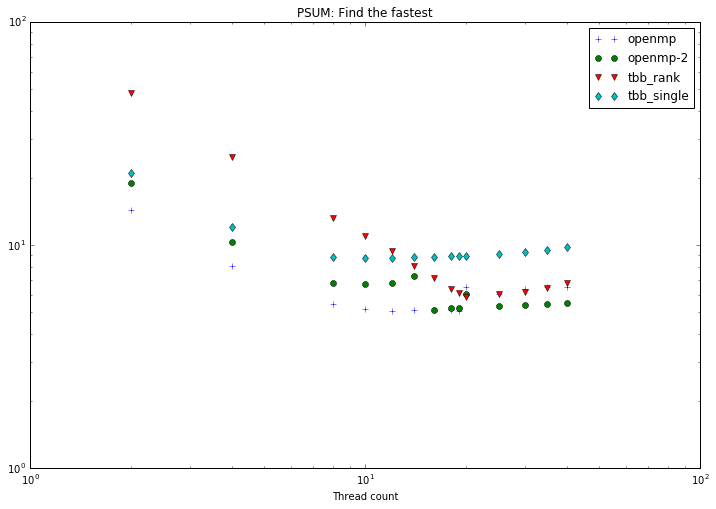

In [12]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
dk='Find the fastest'
ax.loglog(*stdVec.sort(key=lamda ,'+',label='stdVec')
#ax.loglog(openMp2Tcount,openMp2Val,'o',label='openmp-2')
#ax.loglog(tbbRankTcount,tbbRankVal,'v',label='tbb_rank')
#ax.loglog(tbbSingleTcount,tbbSingleVal,'d',label='tbb_single')
#plt.xlabel('Thread count')
plt.title('PSUM: '+ dk)
plt.legend()
plt.show()


In [11]:
openMpTcount

['30',
 '35',
 '4',
 '1',
 '2',
 '8',
 '18',
 '19',
 '16',
 '14',
 '12',
 '10',
 '25',
 '20',
 '40']